42. Trapping Rain Water
Hard

Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.

 

Example 1:

Input: height = [0,1,0,2,1,0,1,3,2,1,2,1]
Output: 6
Explanation: The above elevation map (black section) is represented by array [0,1,0,2,1,0,1,3,2,1,2,1]. In this case, 6 units of rain water (blue section) are being trapped.

Example 2:

Input: height = [4,2,0,3,2,5]
Output: 9

 

Constraints:

    n == height.length
    1 <= n <= 2 * 104
    0 <= height[i] <= 105



Approach 1: Brute force

Intuition

Do as directed in question. For each element in the array, we find the maximum level of water it can trap after the rain, which is equal to the minimum of maximum height of bars on both the sides minus its own height.

Algorithm

    Initialize ans=0
    Iterate the array from left to right:
        Initialize left_max=0 and right_max=0
        Iterate from the current element to the beginning of array updating:
            left_max=max(left_max,height[j])
        Iterate from the current element to the end of array updating:
            ight_max=max(right_max,height[j])
        Add min⁡(left_max,right_max)−height[i] to ans



Approach 2: Dynamic Programming

Intuition

In brute force, we iterate over the left and right parts again and again just to find the highest bar size upto that index. But, this could be stored. Voila, dynamic programming.


Algorithm

    Find maximum height of bar from the left end upto an index i in the array left_max.
    Find maximum height of bar from the right end upto an index i in the array right_max.
    Iterate over the height array and update ans:
        Add min⁡(left_max[i],right_max[i])−height[i]) to ans

int trap(vector<int>& height)
{
    if(height.empty())
        return 0;
    int ans = 0;
    int size = height.size();
    vector<int> left_max(size), right_max(size);
    left_max[0] = height[0];
    for (int i = 1; i < size; i++) {
        left_max[i] = max(height[i], left_max[i - 1]);
    }
    right_max[size - 1] = height[size - 1];
    for (int i = size - 2; i >= 0; i--) {
        right_max[i] = max(height[i], right_max[i + 1]);
    }
    for (int i = 1; i < size - 1; i++) {
        ans += min(left_max[i], right_max[i]) - height[i];
    }
    return ans;
}


Complexity analysis

    Time complexity: O(n).
        We store the maximum heights upto a point using 2 iterations of O(n) each.
        We finally update ans using the stored values in O(n).

    Space complexity: O(n) extra space.
        Additional O(n) space for left_max and right_max arrays than in Approach 1.


Approach 4: Using 2 pointers

Intuition
n.直觉力；（一种）直觉
网络直观；直觉的知识；直觉型

As in Approach 2, instead of computing the left and right parts seperately, we may think of some way to do it in one iteration. From the figure in dynamic programming approach, notice that as long as right_max[i]>left_max[i](from element 0 to 6), the water trapped depends upon the left_max, and similar is the case when left_max[i]>right_max[i](from element 8 to 11). So, we can say that if there is a larger bar at one end (say right), we are assured that the water trapped would be dependant on height of bar in current direction (from left to right). As soon as we find the bar at other end (right) is smaller, we start iterating in opposite direction (from right to left). We must maintain left_max and right_max during the iteration, but now we can do it in one iteration using 2 pointers, switching between the two.

Algorithm

    Initialize left pointer to 0 and right pointer to size-1

    While left<right, do:
        If height[left] is smaller than height[right]:
            If height[left]≥left_max:
                update left_max

            Else:
                add left_max−height[left] to ans
            Add 1 to left.
        Else
            If height[right]≥right_max:
                update right_max
            Else 
                add right_max−height[right] to ans
            Subtract 1 from right


In [32]:
from turtle import left
from typing import List
from matplotlib import pyplot as plt
%matplotlib inline
class Solution42:
    def trap1(self, height: List[int]) -> int:
        areas = 0
        max_l = max_r = 0
        l = 0
        r = len(height)-1
        while l < r:
            if height[l] < height[r]:
                if height[l] > max_l:
                    max_l = height[l]
                else:
                    areas += max_l - height[l]
                l +=1
            else:
                if height[r] > max_r:
                    max_r = height[r]
                else:
                    areas += max_r - height[r]
                r -=1
        return areas
    def trap2(self, height: List[int]) -> int:
        res = 0
        size = len(height)
        left_max = [0] * size
        right_max = [0] * size

        left_max[0] = height[0]
        right_max[size-1] = height[size-1]

        print("1:{},{}".format(left_max, right_max))

        for i in range(1, size):
            left_max[i] = max(height[i], left_max[i-1])

        for i in range(size-2, -1, -1):
            right_max[i] = max(height[i], right_max[i+1])
        print("2:{},{}".format(left_max, right_max))

        for i in range(1, size-1):
            res += min(left_max[i], right_max[i]) - height[i]
        return res
    # If I compute the hole area and minus the shadow area?
    # Can not contain left[0], so the below makes no sense.
    def trap3(self, height: List[int]) -> int:
        high = max(height)
        width = len(height)
        hole = high * width

        origin = sum(height)
        print(hole, origin)
        return hole - origin
    # Brute force
    def trap4(self, height: List[int]) -> int:
        res = 0
        
        for i in range(len(height)):
            left_max = right_max = 0
            tmp_left = []
            for j in range(i, -1, -1):
                left_max = max(left_max, height[j])
                tmp_left.append(left_max)
            print(i)
            plt.plot(tmp_left)
            for j in range(i, len(height)):
                right_max = max(right_max, height[j])
            res += min(left_max, right_max) - height[i]
        return res


In [33]:
height = [0,1,0,2,1,0,1,3,2,1,2,1]
s = Solution42()
s.trap2(height)

1:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
2:[0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3],[3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1]


6

In [13]:
s.trap3(height)

36 14


22

0
1
2
3
4
5
6
7
8
9
10
11


6

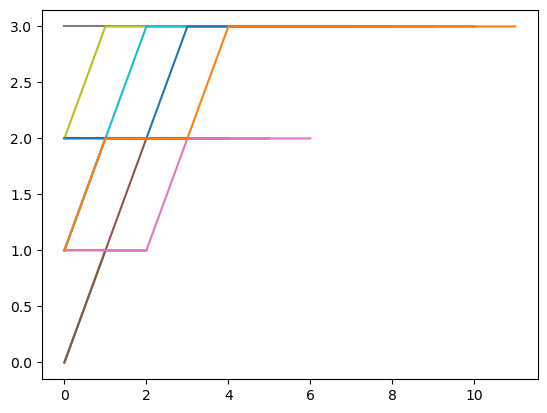

In [34]:
s.trap4(height)

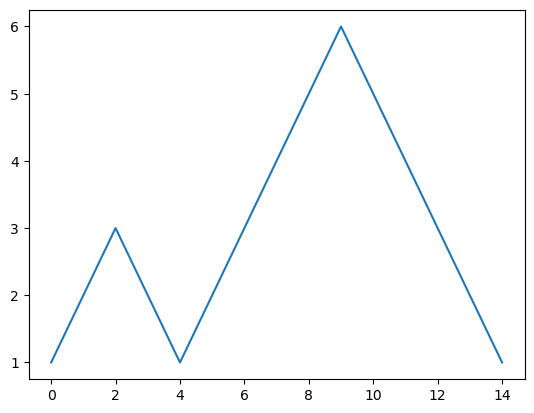

In [28]:
plt.plot([1, 2, 3, 2, 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1])